<a href="https://colab.research.google.com/github/dsliwka/EEMP2023/blob/main/KNN2023exampleCommented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
## Generate some data where we know the true CEF
n = 200
df = pd.DataFrame(index=range(n))

# Generate age variable
df['age'] = np.random.uniform(18, 70, size = n)

# Generate "true" Conditional expectation function of income
df['CE']=4*df['age']-0.04*df['age']**2

# Generate realized income = CE (which depends on age) + irreducible noise
df['income'] = df.CE + np.random.normal(0,10,n)

# Prepare prediction
X = df[['age']]
y = df['income']

<Axes: xlabel='age', ylabel='income'>

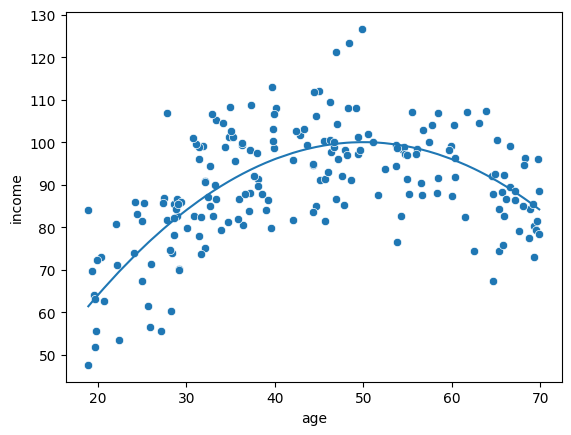

In [4]:
## Show the data
sns.scatterplot(x='age', y='income', data=df)

## The lineplot shows the true CEF
sns.lineplot(x='age', y='CE', data=df)


First we train a knn regression on the whole data
- We start with 5 neighbors
- We obtain a relativel high R²
- The blue line shows the estimated algoithm
- Change the number of neighbors to vary how flexible/rigid the alogorithm becomes


R²: 0.570008587814669


<Axes: xlabel='age', ylabel='income'>

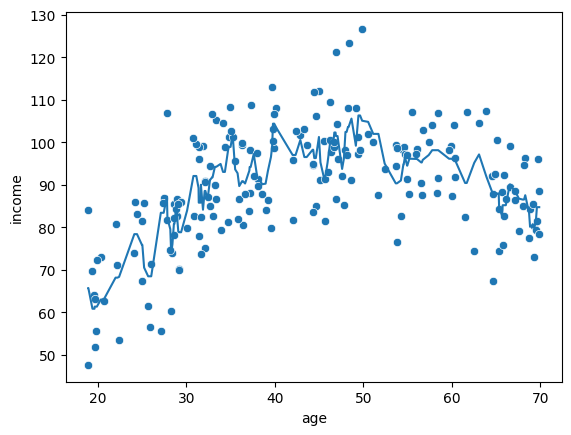

In [5]:
knn=KNeighborsRegressor(n_neighbors=5).fit(X,y)

ypred=knn.predict(X)

print("R²:", r2_score(y,ypred))

sns.scatterplot(x='age', y='income', data=df)

sns.lineplot(x=X.age, y=knn.predict(X))

- Now split into train and test data
- And train the algorithm on the training sample

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=181)

knn=KNeighborsRegressor(n_neighbors=2).fit(X_train,y_train)
print("R² train:", r2_score(y_train,knn.predict(X_train)))
print("R² test:", r2_score(y_test,knn.predict(X_test)))

R² train: 0.7387423291016458
R² test: 0.241862862811558


- The test R² is lower than the train R² because there is overfitting in the training set
- The algorithm follows some patterns in the training data which are there just by chance and thus will not be there in the test data set  

\

The following plot shows the training data in blue and the test data in organge
- The light blue line shows the prediction

\
To better understand the bias/variance trade-off do the following:
- Change the number of neigbors and inspect how the prediction changes when you run the code in the cell
- When n_neighbors=1 the prediction is just a copy of the training data. There is lots of variance. To see that run the cell sevaral times and note how the shape changes depending on which obs are in the training and test cell.
- Increase the number of neighbors from 1 to 2 to 3 and so on
- You reduce the flexibility (reduce variance). Initially this will help  and the test R² will increase as you reduce variance
- Then increase it substantially, for intsance to 80. The variance will decrease. To see that run it repeately getting different train test splits - you will see that the prediction remains pretty stable
- But here you can less flexibly adapt to the data --> you have high bias



R² test: 0.15


<Axes: xlabel='age', ylabel='income'>

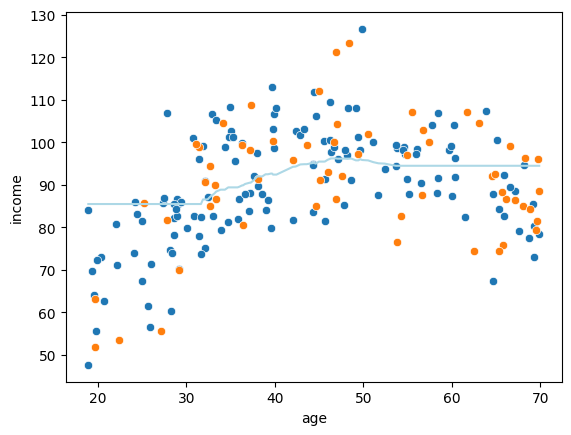

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

knn=KNeighborsRegressor(n_neighbors=80).fit(X_train,y_train)
print("R² test:", round(r2_score(y_test,knn.predict(X_test)),2))
sns.scatterplot(x=X_train.age, y=y_train)
sns.scatterplot(x=X_test.age, y=y_test)
sns.lineplot(x=X.age, y=knn.predict(X), color='lightblue')

The next cell runs a loop varying the number of neighbors
- Inspect how the training and test R² change
- Note the common pattern:
  - When you start at the end of the list with a high number of neighbors
  - You start with an inflexible algorithm
  - When you lower the number of neighbors, you increase flexibility
  - That always increases the training R²
  - Initially it also increases the test R²
  - But at some point, it will tend to lead to too much overfitting
  - The test R² will then start to decrease


In [8]:
for k in range(1,100,3):
  knn=KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
  print( k, " neighbors: Train R²=", round(r2_score(y_train,knn.predict(X_train)),2), "and Test R² = ", round(r2_score(y_test,knn.predict(X_test)),2))



1  neighbors: Train R²= 1.0 and Test R² =  0.04
4  neighbors: Train R²= 0.56 and Test R² =  0.47
7  neighbors: Train R²= 0.5 and Test R² =  0.49
10  neighbors: Train R²= 0.46 and Test R² =  0.5
13  neighbors: Train R²= 0.44 and Test R² =  0.51
16  neighbors: Train R²= 0.44 and Test R² =  0.51
19  neighbors: Train R²= 0.45 and Test R² =  0.52
22  neighbors: Train R²= 0.43 and Test R² =  0.51
25  neighbors: Train R²= 0.41 and Test R² =  0.5
28  neighbors: Train R²= 0.4 and Test R² =  0.5
31  neighbors: Train R²= 0.38 and Test R² =  0.48
34  neighbors: Train R²= 0.37 and Test R² =  0.47
37  neighbors: Train R²= 0.36 and Test R² =  0.46
40  neighbors: Train R²= 0.35 and Test R² =  0.44
43  neighbors: Train R²= 0.34 and Test R² =  0.42
46  neighbors: Train R²= 0.32 and Test R² =  0.42
49  neighbors: Train R²= 0.29 and Test R² =  0.38
52  neighbors: Train R²= 0.28 and Test R² =  0.36
55  neighbors: Train R²= 0.27 and Test R² =  0.35
58  neighbors: Train R²= 0.26 and Test R² =  0.35
61  neigh

# **Decision Trees**
----
- Here we estimate a decision tree
- Note that a tree of depth d has up to 2 to the power of d leafs (a tree of depth 3 has up to 8 leaves)
- As here we only have one feature, each branch is a specific interval
- Vary the depth of the tree to again see how the bias variance trade-off here affects the prediction
- Note how quickly overfitting becomes an issue here when you increase the depth of a tree


R²= 0.44


<Axes: xlabel='age', ylabel='income'>

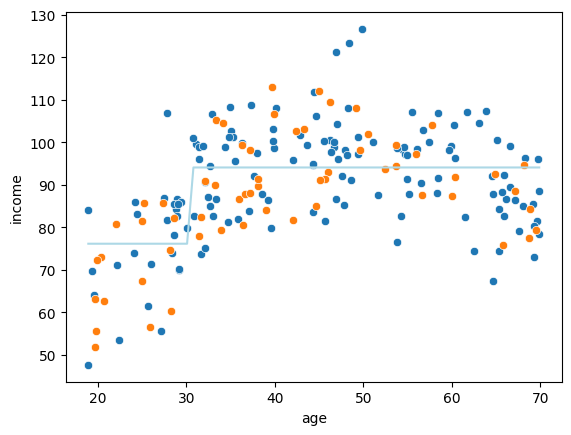

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)


from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=1,random_state=181).fit(X_train, y_train)

print("R²=",round(r2_score(y_test,dtree.predict(X_test)),2))

sns.scatterplot(x=X_train.age, y=y_train)
sns.scatterplot(x=X_test.age, y=y_test)
sns.lineplot(x=X.age, y=dtree.predict(X), color='lightblue')

One way to recude overfitting is to use another hyperparameter: the minimal number of samples per leaf (min_samples_leaf=30).
- Increasing this hyperparameter reduces the flexibility -> but in turn also overfitting

R²= 0.5


<Axes: xlabel='age', ylabel='income'>

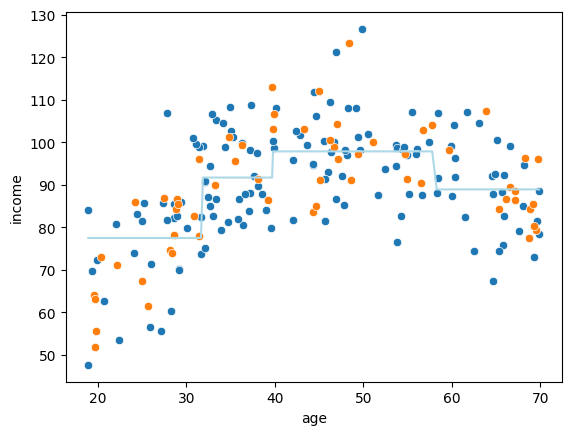

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)


from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=30, random_state=181).fit(X_train, y_train)

print("R²=",round(r2_score(y_test,dtree.predict(X_test)),2))

sns.scatterplot(x=X_train.age, y=y_train)
sns.scatterplot(x=X_test.age, y=y_test)
sns.lineplot(x=X.age, y=dtree.predict(X), color='lightblue')

Here we plot the tree:
- Note that you can map the split points to the "jumps" in the above graph

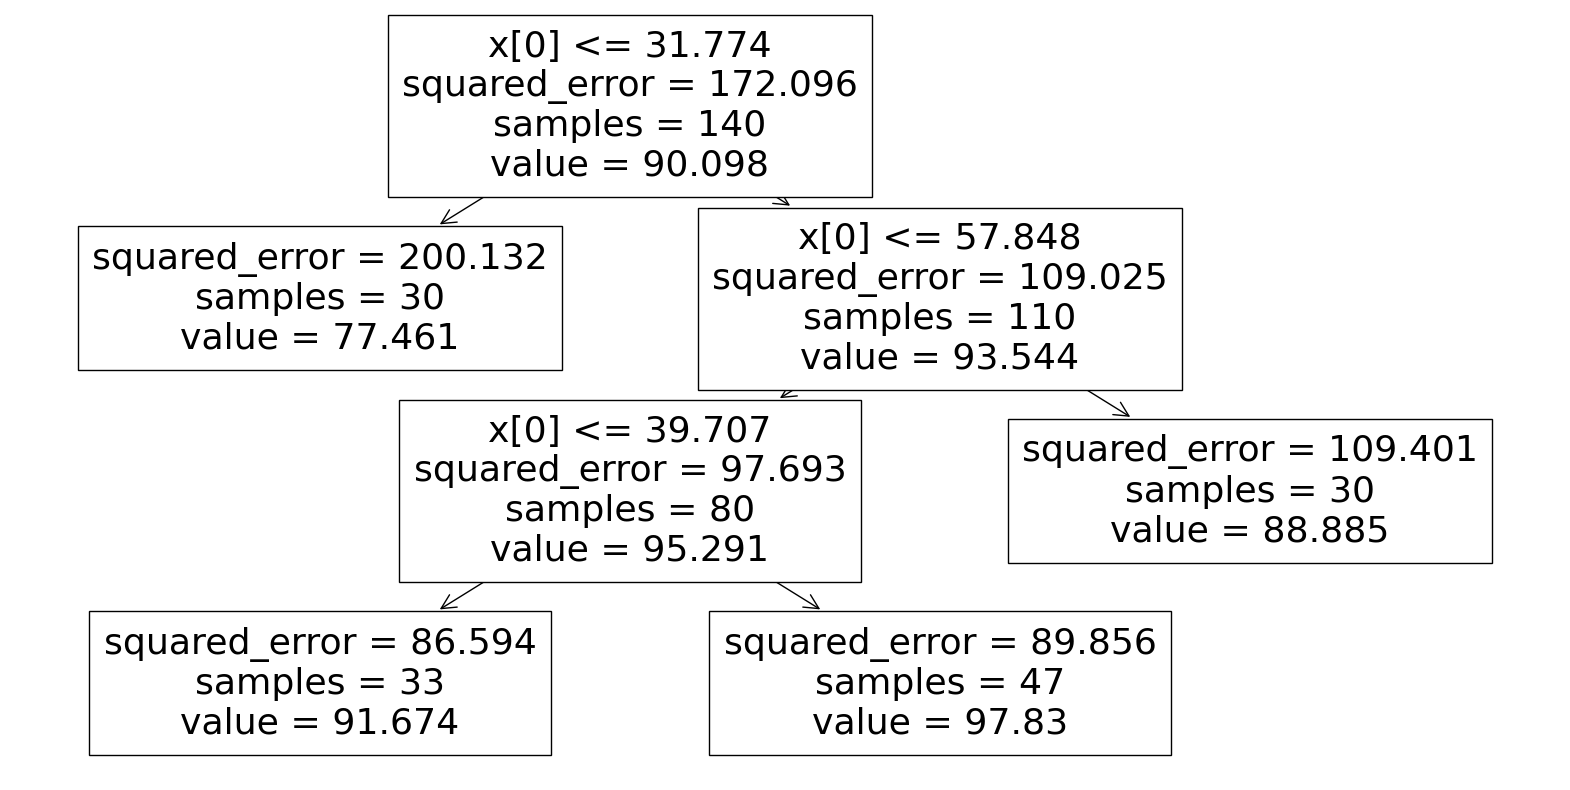

In [47]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dtree)
plt.show()